# Hypothesis Testing in R

## Parametric Tests

Parametric tests are statistical tests that assume the data follows a certain distribution, usually the normal distribution. They also assume parameters like mean and variance are meaningful for describing the data.

**Examples of parametric tests:**

* Z-test (for population mean or proportions, when variance is known)

* T-test (for means when variance is unknown)

* ANOVA (comparing means of 3 or more groups)

### Z-scores

A Z-score measures how many standard deviations a value is from the mean.
                 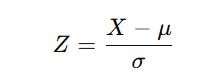

In R, pnorm() gives the cumulative probability from the normal distribution.

In R, qnorm finds quantiles (the cutoff value for a given probability).

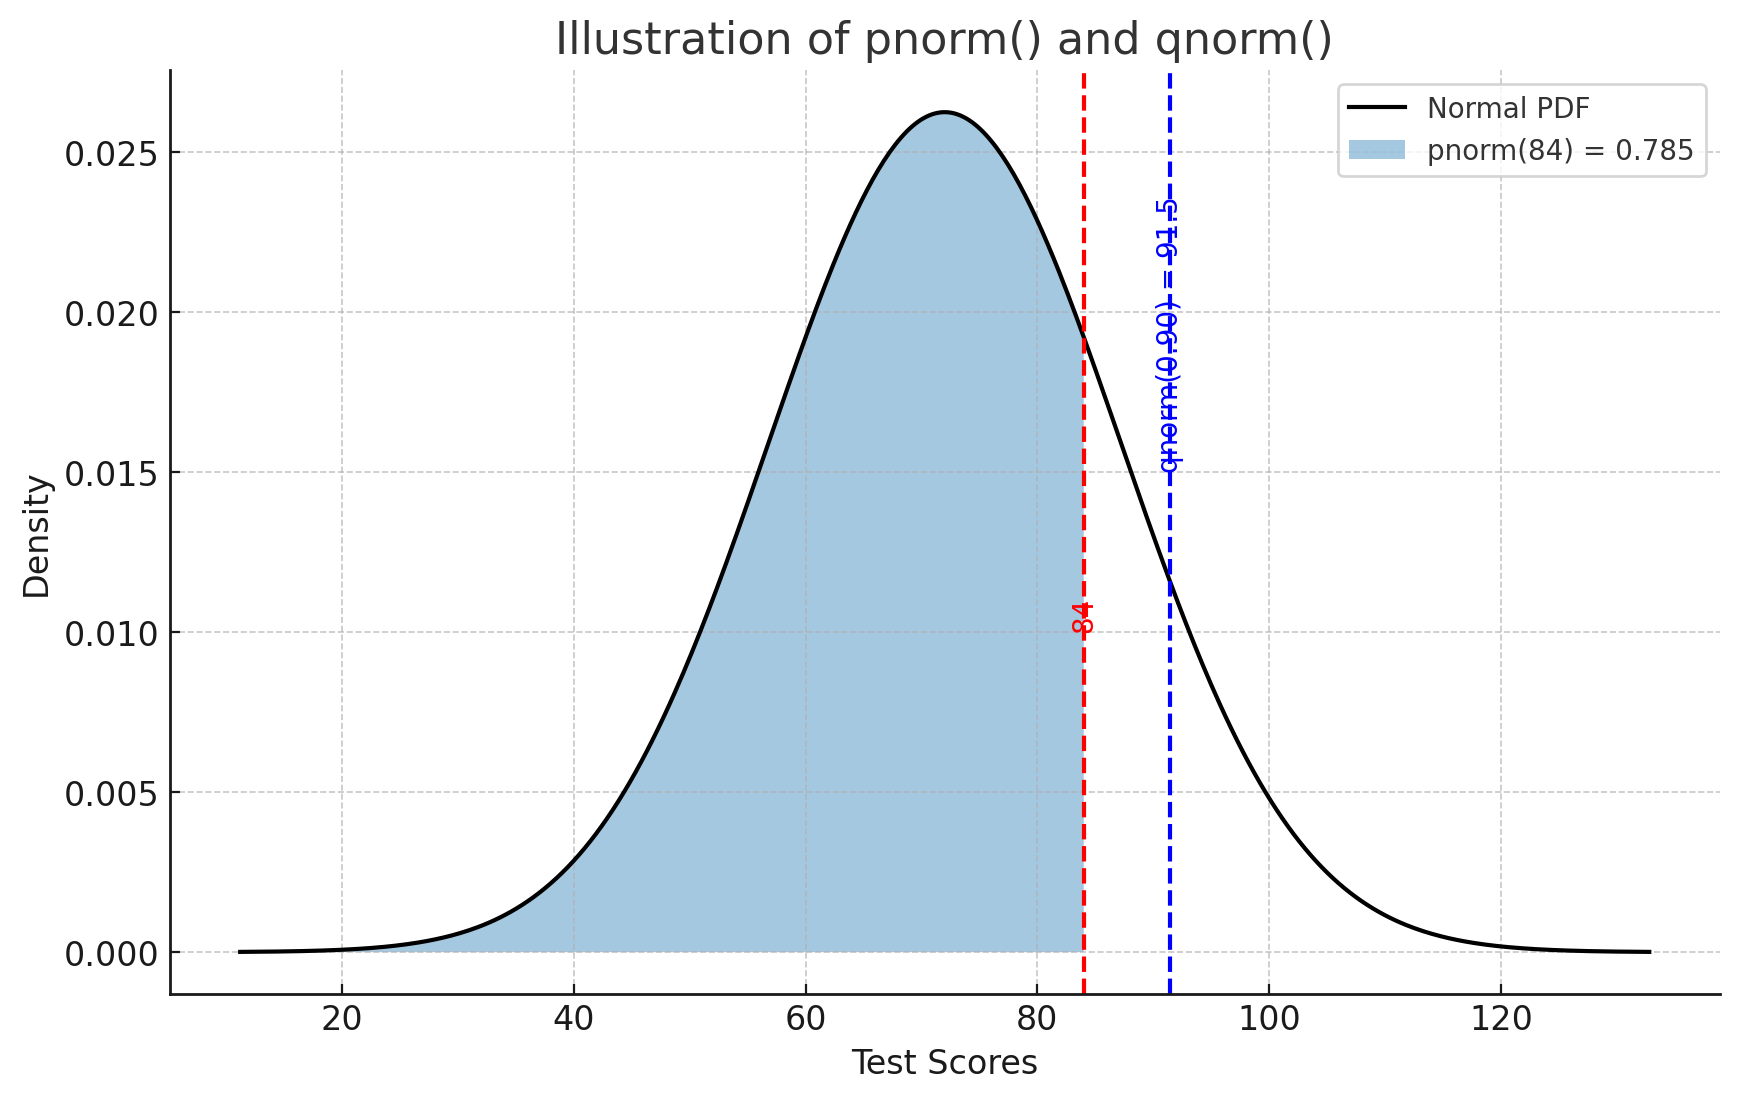

In [2]:
# Example 1: Probability that Z < 1.96
pnorm(1.96)
# Output ≈ 0.975 (about 97.5%)

# Example 2: Probability between -1.96 and 1.96
pnorm(1.96) - pnorm(-1.96)
# Output ≈ 0.95 (95% confidence interval)

# Example 3: Find probability for a raw score X=85
# Suppose population mean=80, sd=10
x <- 85; mu <- 80; sigma <- 10
z <- (x - mu)/sigma
pnorm(z)   # Probability of getting less than 85

# Find the z-value for 97.5% cumulative probability
qnorm(0.975)




[1] 0.9750021

[1] 0.9500042

[1] 0.6914625

[1] 1.959964

**Question:**
 
The test scores of an entrance exam fit a normal distribution with the mean test score of 72 and a standard deviation of 15.2. Compute the percentage of students scoring 84 or more.

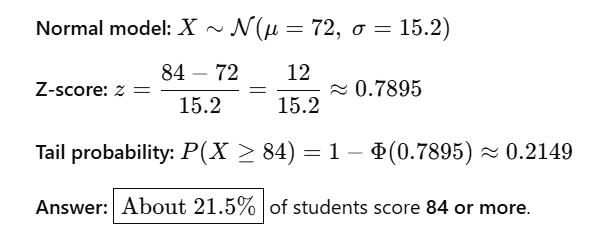

In [7]:
pnorm(84, mean = 72, sd = 15.2)
# We can see that the required percentage of students who scored above 84 marks is 21.4% and those who scored less than 84 marks are (100-21.4)% = 78.6%

[1] 0.7850824

### T-scores (Student’s t-distribution)

A t-score is similar to a z-score, but it is used when:

The population standard deviation (σ) is unknown.

The sample size is relatively small (usually n<30).

Instead of the normal distribution, we use the t-distribution, which has thicker tails (more spread) than the normal curve. As the sample size increases, the t-distribution approaches the normal distribution.

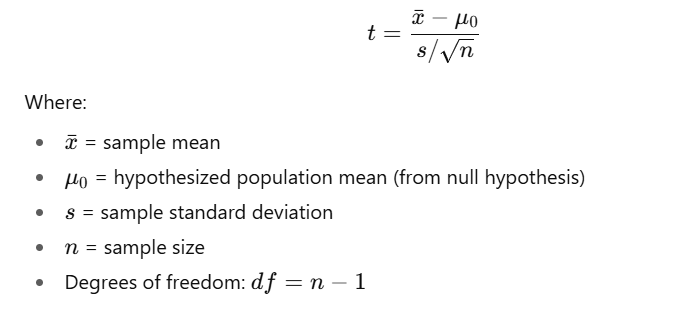

In [8]:
# Find the probability that a t-score is less than 1.5 with df = 10.
pt(1.5, df = 10)

# Find the critical t-value at the 95th percentile with df = 10.
qt(0.95, df = 10)

[1] 0.9177463

[1] 1.812461

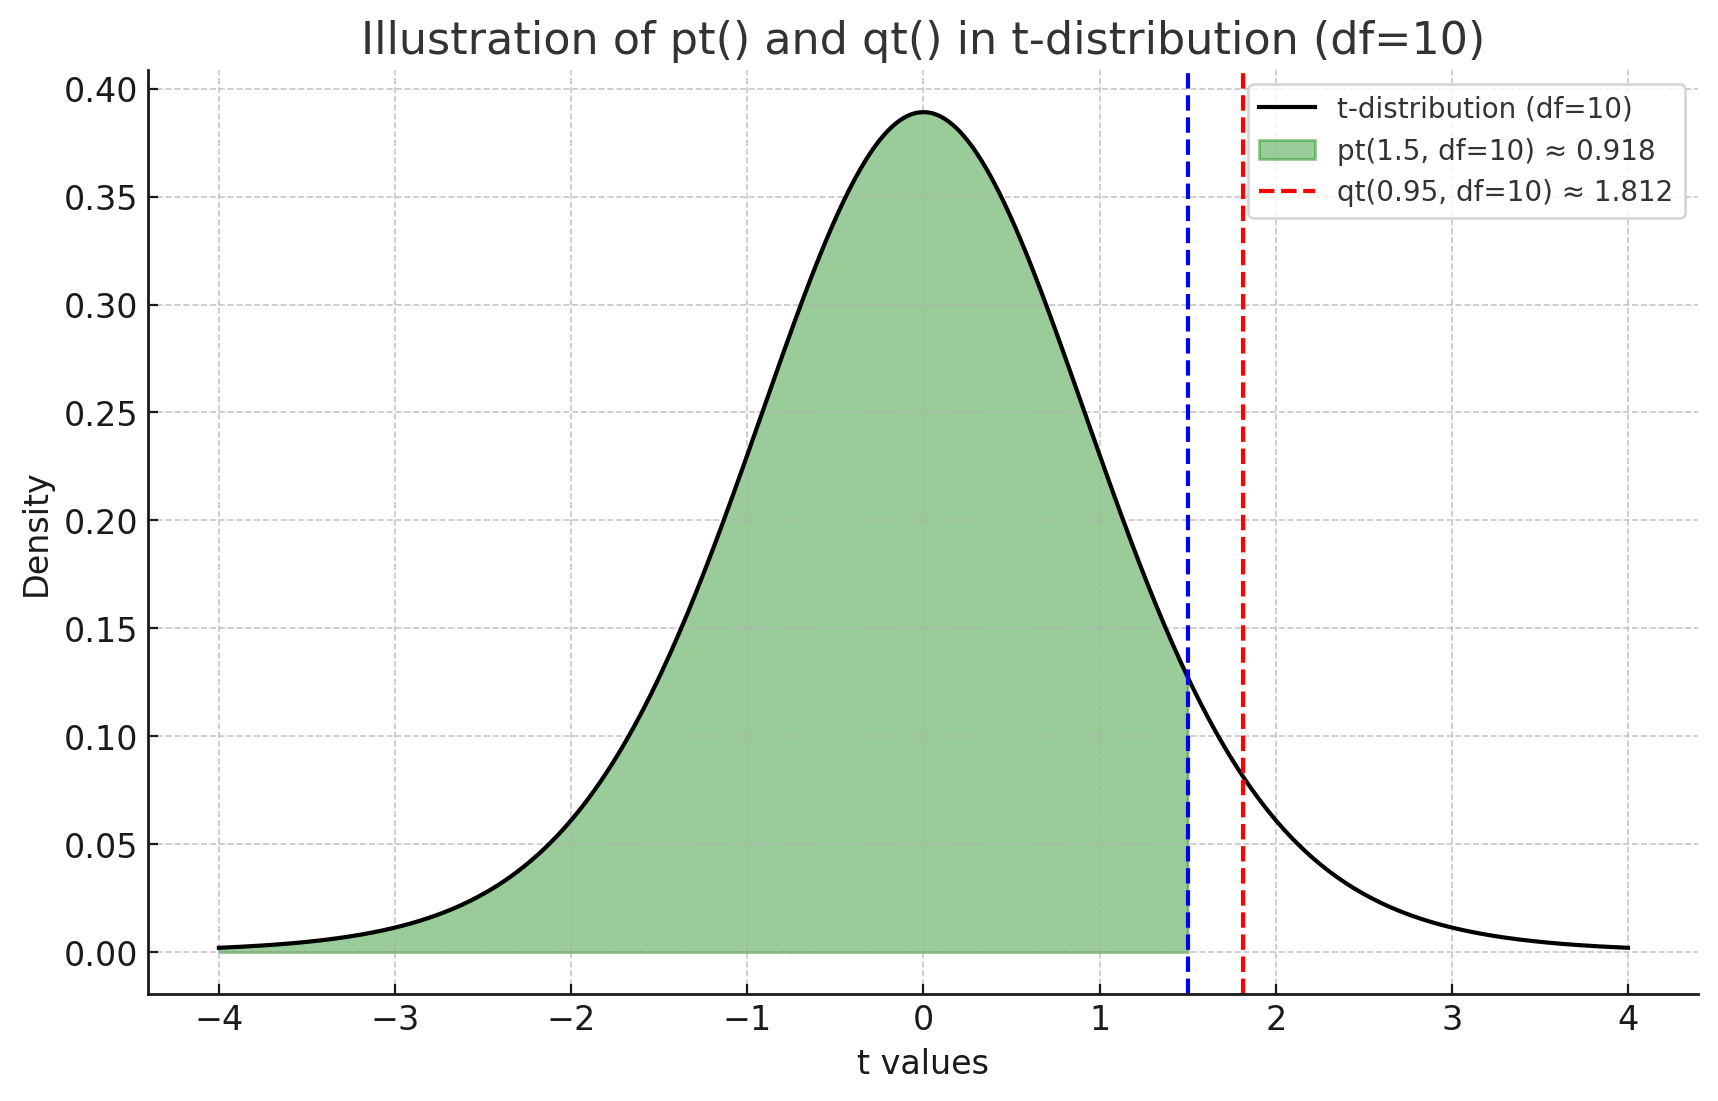

### ANOVA

ANOVA (Analysis of Variance) is a statistical method used to compare the means of three or more groups to check if at least one group mean is significantly different from the others.

Instead of comparing each pair of means with multiple t-tests, ANOVA uses variance to test all groups at once.

It works by comparing:

Between-group variance (variation of group means around the overall mean)

Within-group variance (variation of individual observations within each group).

If the between-group variance is large relative to the within-group variance, it suggests that group means are different.

​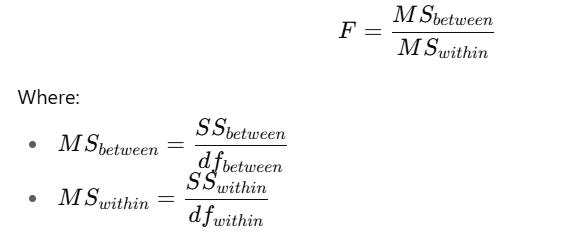





In [ ]:
# Test whether three teaching methods lead to different student scores

# Sample data
scores <- c(85, 78, 90, 88, 76,   # Method A
            92, 95, 89, 96, 94,   # Method B
            75, 70, 72, 68, 74)   # Method C

method <- factor(rep(c("A", "B", "C"), each = 5))

data <- data.frame(scores, method)

# One-way ANOVA
anova_result <- aov(scores ~ method, data = data)

# Show summary
summary(anova_result)



            Df Sum Sq Mean Sq F value   Pr(>F)    
method       2 1147.6   573.8   32.06 1.54e-05 ***
Residuals   12  214.8    17.9                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### ToothGrowth Dataset Parameters
| Parameter | Description                                                     | Values / Levels                       |
| --------- | --------------------------------------------------------------- | ------------------------------------- |
| **len**   | Tooth length (numeric, response variable)                       | Range: 4.2 – 33.9                     |
| **supp**  | Supplement type (factor)                                        | OJ (Orange Juice), VC (Ascorbic Acid) |
| **dose**  | Dose of Vitamin C in mg/day (numeric → often treated as factor) | 0.5, 1.0, 2.0                         |


## Two-Way ANOVA in R

The ToothGrowth dataset is built into R and is often used to illustrate ANOVA.
It contains the effect of Vitamin C (dose) and supplement type (supp) on tooth length in guinea pigs.

In [12]:
# Load dataset
data("ToothGrowth")

# Convert dose to a factor (since it's categorical levels: 0.5, 1, 2)
ToothGrowth$dose <- factor(ToothGrowth$dose)

# Two-way ANOVA: effect of supplement type and dose
# With interaction
summary(aov(len ~ supp * dose, data = ToothGrowth))

# Without interaction
summary(aov(len ~ supp + dose, data = ToothGrowth))



            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4   14.02 0.000429 ***
dose         2 2426.4  1213.2   82.81  < 2e-16 ***
Residuals   56  820.4    14.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## Summary

Based on assumptions: data is normally distributed, samples independent, equal variances (for some tests).

* Use population parameters (mean, variance).

* More powerful than non-parametric tests when assumptions hold.

| Test       | Purpose                                                          | When to Use                   |
| ---------- | ---------------------------------------------------------------- | ----------------------------- |
| **Z-test** | Compare sample mean to population mean (standardized difference) | Population σ known, large n   |
| **T-test** | Compare means (sample vs population or two groups)               | Population σ unknown, small n |
| **ANOVA**  | Compare ≥3 group means using variance ratios                     | Multiple groups, σ unknown    |
